### sklearn.ensemble.RandomForestClassifier
* _class_ sklearn.ensemble.RandomForestClassifier(_n_estimators=100_, _*_, _criterion='gini'_, _max_depth=None_, _min_samples_split=2_, _min_samples_leaf=1_, _min_weight_fraction_leaf=0.0_, _max_features='sqrt'_, _max_leaf_nodes=None_, _min_impurity_decrease=0.0_, _bootstrap=True_, _oob_score=False_, _n_jobs=None_, _random_state=None_, _verbose=0_, _warm_start=False_, _class_weight=None_, _ccp_alpha=0.0_, _max_samples=None_)[[source]](https://github.com/scikit-learn/scikit-learn/blob/7db5b6a98/sklearn/ensemble/_forest.py#L1081)[¶](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier "Permalink to this definition")
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the  `max_samples`  parameter if  `bootstrap=True`  (default), otherwise the whole dataset is used to build each tree.

Read more in the  [User Guide](https://scikit-learn.org/stable/modules/ensemble.html#forest).

In [1]:
import pandas as pd

feature_name_df = pd.read_csv("./datasets/features.txt",sep='\s+',
           header=None,names=['column_index','column_name'])

feature_name = feature_name_df.iloc[:, 1].values.tolist()
print(feature_name[:10])

['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [2]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(),feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name','dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1])
                                                                                              if x[1]>0 else x[0], axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)

    return new_feature_name_df

In [3]:
import pandas as pd



def get_human_dataset():
    
    feature_name_df = pd.read_csv('./datasets/features.txt', sep='\s+',
                                                     header=None, names=['column_index', 'column_name'])
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    X_train = pd.read_csv('./datasets/train/X_train.txt', sep='\s+', names=feature_name)
    X_test = pd.read_csv('./datasets/test/X_test.txt', sep='\s+', names=feature_name)
    
    y_train = pd.read_csv('./datasets/train/y_train.txt', sep='\s+', header=None, names=['action'])
    y_test = pd.read_csv('./datasets/test/y_test.txt', sep='\s+', header=None, names=['action'])
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

X_train, X_test, y_train, y_test = get_human_dataset()

rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)

print('랜덤포레스트 정확도:', round(accuracy, 4))

C:\Users\seopa\AppData\Local\Temp\ipykernel_23652\2505551571.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(X_train, y_train)


랜덤포레스트 정확도: 0.9253


In [5]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators' : [100],
    'max_depth' : [6, 8, 10, 12, 16, 20, 24],
    'min_samples_leaf' : [8, 12, 18],
    'min_samples_split' : [8, 16, 20]
         }

rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('GridSearchCV 최고 평균 정확도 수치: ',round(grid_cv.best_score_, 4))
print('GridSearchCV 최적 하이퍼파라미터: ', grid_cv.best_params_)

C:\Users\seopa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV 최고 평균 정확도 수치:  0.918
GridSearchCV 최적 하이퍼파라미터:  {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}


In [6]:
rf_clf_1 = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8, min_samples_split=8, random_state=0,)
rf_clf_1.fit(X_train, y_train)
pred = rf_clf_1.predict(X_test)
accuracy = accuracy_score(y_test, pred)

print('예측정확도:', round(accuracy, 4))

C:\Users\seopa\AppData\Local\Temp\ipykernel_23652\2654161874.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf_1.fit(X_train, y_train)


예측정확도: 0.9165


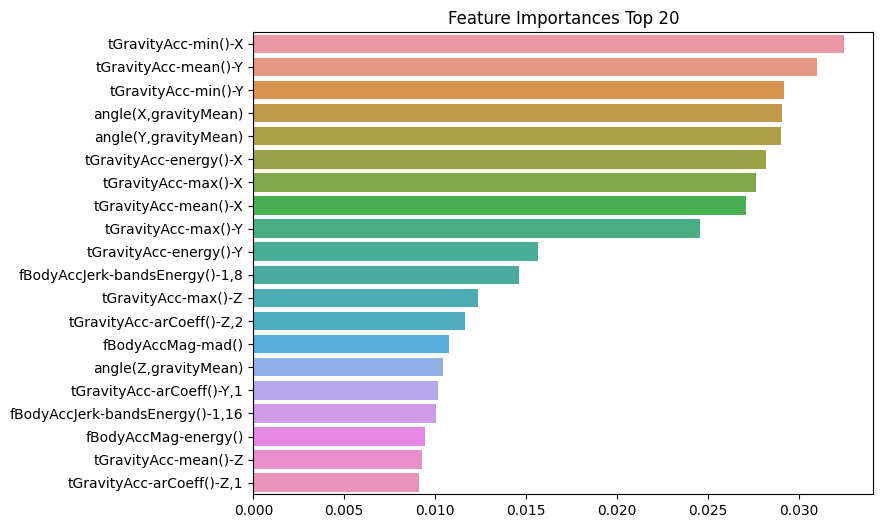

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf_1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=[8, 6])
plt.title('Feature Importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()